### Shahid Dhamani

### Final ML project

### Pre setup - loading and encoding drugs

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving drugs_10.csv to drugs_10.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving world.csv to world.csv


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
dataset  = pd.read_csv('world.csv')

In [ ]:
smiles_only = dataset['smiles']

In [ ]:
smiles_only

0                               C[C@@H]1O[C@@H]1P(=O)(O)O
1                  Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1
2                        Nc1nc(N)c2nc(-c3ccccc3)c(N)nc2n1
3                                         Oc1cccc2cccnc12
4       COc1c(N2CCN[C@H](C)C2)c(F)cc2c(=O)c(C(=O)O)cn(...
                              ...                        
1554    Cc1nnc(C(C)C)n1C1C[C@@H]2CC[C@H](C1)N2CC[C@H](...
1555                         C[C@H]1[C@H](c2ccccc2)OCCN1C
1556    CCOc1ccc(C[C@@H](CN(CCN(CC(=O)O)CC(=O)O)CC(=O)...
1557    CC1(C)[C@H]2CC[C@@]1(CS(=O)(=O)O)C(=O)/C2=C/c1...
1558                                  [C-]#[N+]CC(C)(C)OC
Name: smiles, Length: 1559, dtype: object

In [ ]:
dataset['len'] = dataset['smiles'].apply(lambda x: 1 if len(x) < 30 else 0)

In [ ]:
dataset.head()

,zinc_id,smiles,len
0,ZINC000001532673,N[C@@H](CSSC[C@H](N)C(=O)O)C(=O)O,0
1,ZINC000001408068,O=C(O)c1cc(O)nc(O)n1,1
2,ZINC000001532582,NC(=O)CCCC[C@H]1CCSS1,1
3,ZINC000003830381,CCCCC[C@](C)(O)/C=C/[C@H]1[C@H](O)C[C@H](O)[C@...,0
4,ZINC000003830394,Cn1nnnc1SCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H...,0


In [ ]:
smiles_sm = dataset.smiles.values

In [ ]:
true = dataset.len.values

In [ ]:
true

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
grp_smiles = dataset.groupby('len')

In [ ]:
final = grp_smiles.get_group(1).reset_index()

In [ ]:
final.head()

,index,zinc_id,smiles,len
0,1,ZINC000001408068,O=C(O)c1cc(O)nc(O)n1,1
1,2,ZINC000001532582,NC(=O)CCCC[C@H]1CCSS1,1
2,9,ZINC000001544807,O=C(O)CCCC[C@@H]1CCSS1,1
3,32,ZINC000001532734,NCCCNCCCCNCCCN,1
4,33,ZINC000001532556,NC(=O)C[C@H](N)C(=O)O,1


In [ ]:
SMILES_CHARS = [' ',
                  '#', '%', '(', ')', '+', '-', '.', '/',
                  '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                  '=', '@',
                  'A', 'B', 'C', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P',
                  'R', 'S', 'T', 'V', 'X', 'Z',
                  '[', '\\', ']',
                  'a', 'b', 'c', 'e', 'g', 'i', 'l', 'n', 'o', 'p', 'r', 's',
                  't', 'u']

In [ ]:
!pip install kora -q
import kora.install.rdkit

In [ ]:
from rdkit import Chem

In [ ]:
from article

In [ ]:
import os
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data = final
from sklearn.model_selection import train_test_split
smiles_train, smiles_test = train_test_split(data["smiles"], random_state=42)
print(smiles_train.shape)
print(smiles_test.shape)

(715,)
(239,)


In [ ]:
charset = set("".join(list(data.smiles))+"!E")
char_to_int = dict((c,i) for i,c in enumerate(charset))
int_to_char = dict((i,c) for i,c in enumerate(charset))
embed = max([len(smile) for smile in data.smiles]) + 5
print(str(charset))
print(len(charset), embed)

{'C', '[', '=', '+', '(', ')', '@', 'F', 'i', '2', 's', 'P', ']', 'H', 'E', '#', 'c', '1', 'N', 'I', 'o', 'r', '\\', '/', 'B', 'O', '3', 'l', 'S', '-', '!', 'n'}
32 34


In [ ]:
import matplotlib.pyplot as plt

OCc1ccc(Cl)cc1Cl
(715, 33, 32)


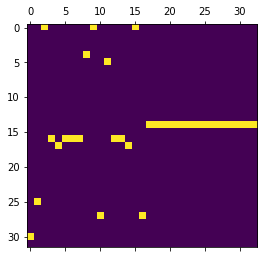

In [ ]:
def vectorize(smiles):
        one_hot =  np.zeros((smiles.shape[0], embed , len(charset)),dtype=np.int8)
        for i,smile in enumerate(smiles):
            #encode the startchar
            one_hot[i,0,char_to_int["!"]] = 1
            #encode the rest of the chars
            for j,c in enumerate(smile):
                one_hot[i,j+1,char_to_int[c]] = 1
            #Encode endchar
            one_hot[i,len(smile)+1:,char_to_int["E"]] = 1
        #Return two, one for input and the other for output
        return one_hot[:,0:-1,:], one_hot[:,1:,:]
X_train, Y_train = vectorize(smiles_train.values)
X_valid,Y_valid = vectorize(smiles_test.values)
print(smiles_train.iloc[0])
plt.matshow(X_train[0].T)
print(X_train.shape)

In [ ]:
"".join([int_to_char[idx] for idx in np.argmax(X_train[0,:,:], axis=1)])


'!OCc1ccc(Cl)cc1ClEEEEEEEEEEEEEEEE'

### VAE model defined

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Concatenate
from keras import regularizers

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
import keras

In [ ]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 12

inputs = keras.layers.Input(shape = [33, 32])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(1500, activation="selu")(z)
z = keras.layers.Dense(1000, activation="selu")(z)
z = keras.layers.Dense(200, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

In [ ]:
variational_ae.save('/content/drive/MyDrive/Colab Notebooks')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/assets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(1615 * 1, activation="selu")(x)
x = keras.layers.Dense(33*32, activation="sigmoid")(x)
outputs = keras.layers.Reshape([33, 32])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss)/1056)
variational_ae.compile(loss="binary_crossentropy", optimizer="adam")
history = variational_ae.fit(X_train, X_train, epochs=2000, batch_size=128,  validation_data=(X_valid, X_valid))

Epoch 1/2000
6/6 [==============================] - 1s 54ms/step - loss: 0.5437 - val_loss: 0.1576
Epoch 2/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.1807 - val_loss: 0.1203
Epoch 3/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.1217 - val_loss: 0.1230
Epoch 4/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.1139 - val_loss: 0.0993
Epoch 5/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0938 - val_loss: 0.0899
Epoch 6/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0879 - val_loss: 0.0880
Epoch 7/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0858 - val_loss: 0.0857
Epoch 8/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0836 - val_loss: 0.0843
Epoch 9/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0810 - val_loss: 0.0828
Epoch 10/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0796 - val_loss: 0.0817
Epoch 11/

In [ ]:
def show_reconstructions(model, images=X_valid, n_images=1):
    pred = []
    reconstructions = model.predict(images[:n_images])
    pred += "".join([int_to_char[idx] for idx in np.argmax(reconstructions[0,:,:], axis=1)])
    return pred

In [ ]:
recon44  = show_reconstructions(variational_ae)

In [ ]:
recon  = show_reconstructions(variational_ae)

In [ ]:
recon

['!',
 'C',
 'C',
 '(',
 '=',
 'O',
 ')',
 'O',
 '[',
 'C',
 '@',
 'H',
 ']',
 '(',
 'C',
 ')',
 'O',
 'C',
 'E',
 'E',
 'E',
 'E',
 'E',
 'E',
 'E',
 'E',
 'E',
 'E',
 'E',
 'E',
 'E',
 'E',
 'E']

In [ ]:
from rdkit.Chem import Draw
from rdkit import Chem
%matplotlib inline

In [ ]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string  
    x = str1.join(s)
    x1 = x.strip('')
    x2 =  x1.split('E')
    x3 = x2[0]
    x3 = x3[1:]
    x4 = str1.join(x3)
    x5 = x4.replace(' ', '')
    return x5

In [ ]:
recon41  = show_reconstructions(variational_ae)
recon41 = listToString(recon41)
recon41

'Cc1ccc(S(=O)(=O)N=l)cc1'

In [ ]:
recon4  = show_reconstructions(variational_ae)
recon4 = listToString(recon4)
recon4

'COc1ccccc1O)c1@=H(F)))c'

In [ ]:
recon55 # valid

'COc1ccccc1OC[C@@H](O)COC(N)'

### VALID SMILES MODEL

In [ ]:
recon42  = show_reconstructions(variational_ae)
recon42 = listToString(recon42)
recon42

'Cc1ccc(S(=O)(=C)NCl)cc1'

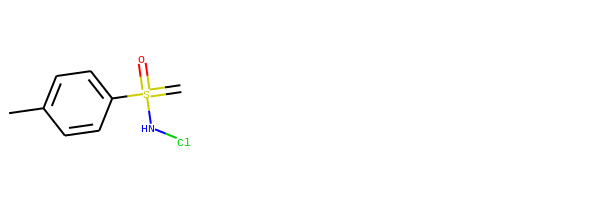

In [ ]:
man = Chem.MolFromSmiles(recon42)
mn = []
mn.append(man)
Draw.MolsToGridImage(mn)

In [ ]:
recon4  = show_reconstructions(variational_ae)

In [ ]:
recon55  = show_reconstructions(variational_ae)

In [ ]:
recon55 = listToString(recon55)

In [ ]:
recon55

'CC(CO)[C@@H](C)OC'

In [ ]:
man = Chem.MolFromSmiles(recon55)

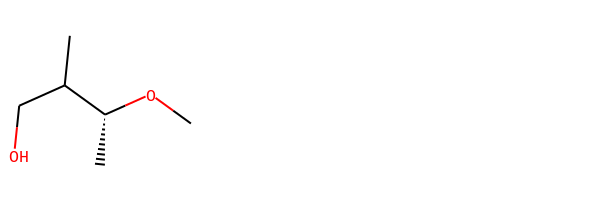

In [ ]:
mn = []
mn.append(man)
Draw.MolsToGridImage(mn)

In [ ]:
recon44  = show_reconstructions(variational_ae)

In [ ]:
recon44 = listToString(recon44)

In [ ]:
recon44 #valid

'COc1ccccc1OC[C@@H](O)COC'

In [ ]:
man = Chem.MolFromSmiles(recon44)
mn = []
mn.append(man)

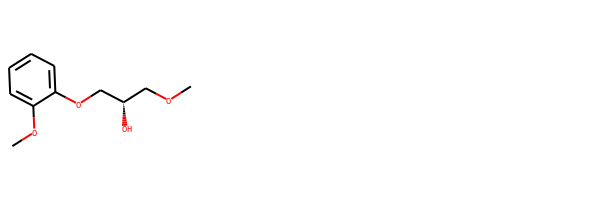

In [ ]:
Draw.MolsToGridImage(mn)

In [ ]:
recon66  = show_reconstructions(variational_ae)

In [ ]:
recon66 = listToString(recon66)

In [ ]:
recon66

'CC(=O)[C@@H](C)O'

In [ ]:
man = Chem.MolFromSmiles(recon66)
mn = []
mn.append(man)

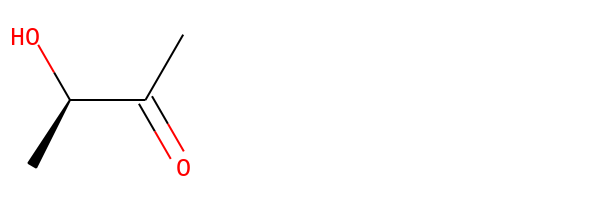

In [ ]:
Draw.MolsToGridImage(mn)